In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sn
import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

## Reading Traces

In [3]:
N=1000
trace = pd.read_pickle("../data/rp-signal/triangle/00.pkl")

In [4]:
delta_t = np.diff(trace['t'].values)[0]
b, a = sn.butter(2, [10e3, 10e6], fs=1/delta_t, btype='band', analog=False)


In [5]:
def moving_average(signal, N=10, step=1):
    filt_sig = []
    for i in range(signal.size):
        if i+N>signal.size-1:
            break
        filt_sig.append(signal[i:N+i].mean())
    return filt_sig

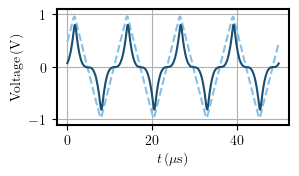

In [6]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4, 4.2))
fig.set_size_inches(3, 1.5, forward=True)
plt.ylim([-1.1, 1.1])
#plt.xlim([-5.5, 5.5])
plt.plot(10*trace['t'].values[:N]/1e-7, moving_average(trace['ch1'].values)[:N], color=colors[1], linestyle='dashed')
plt.plot(10*trace['t'].values[:N]/1e-7, moving_average(trace['ch2'].values)[:N], color=colors[2])

plt.grid()
plt.xlabel(r'$t \,(\mu \textrm{s})$')
plt.ylabel(r'Voltage$\,(\textrm{V})$')

plt.savefig('../plots/input_output_rp.png', bbox_inches='tight', dpi=300)
plt.show()